[Reference](https://medium.com/@pritul.dave/exploratory-data-analysis-diabetes-3ec1fc804b4b)

In [1]:
import pandas as pd
import pandas_profiling as pf
import plotly.express as px
import plotly as py

%matplotlib inline
py.offline.init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/pritul2/Exploratory-Data-Analysis/main/Diabetes/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
fig = px.imshow(df.corr(),text_auto=True)
fig.update_layout(
    width=1000,
    height=1000,
)

In [7]:
fig = px.scatter_matrix(data_frame=df,color=df['Outcome'])
fig.update_layout(
    width=1500,
    height=1500,
    paper_bgcolor="LightSteelBlue",
)

In [8]:
px.box(data_frame=df,color=df['Outcome'])

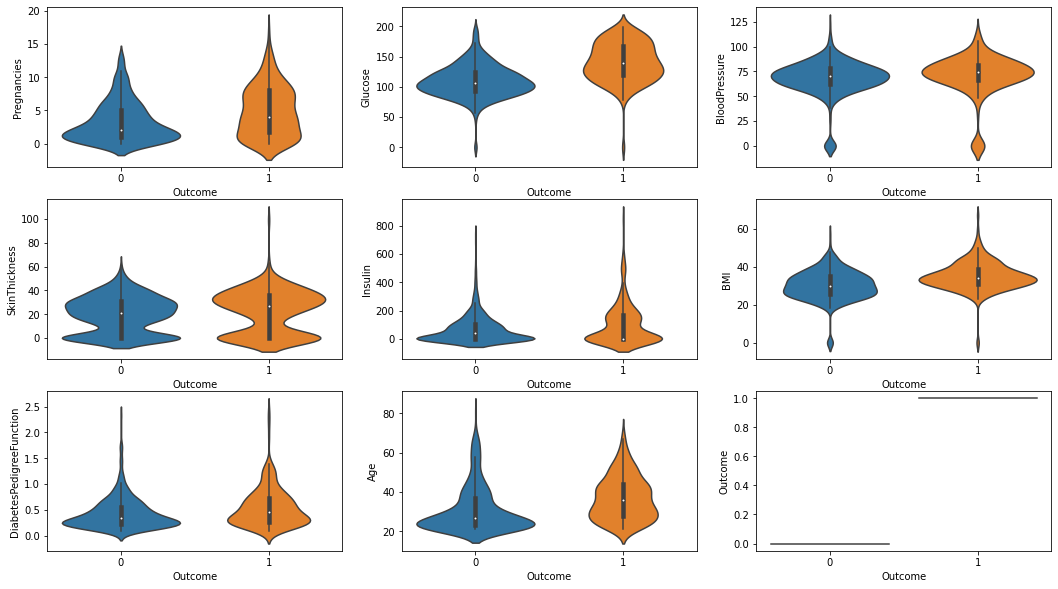

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(3, 3, figsize=(18, 10))

cnt = 0
for i in range(3):
    for j in range(3):
        sns.violinplot(ax=axes[i,j],data=df,x=df.columns[-1],y=df.columns[cnt])
        cnt+=1

In [10]:
age_df = df['Age'][df['Outcome']]

In [11]:
age_df.unique()

array([31, 50])

In [12]:
age_df = df[df['Outcome'].astype('bool')]

In [13]:
len(range(0,age_df.shape[0]))

268

In [14]:
age_df[['Age','Outcome']].value_counts()

Age  Outcome
25   1          14
29   1          13
41   1          13
31   1          13
43   1          11
22   1          11
38   1          10
36   1          10
33   1          10
28   1          10
32   1           9
45   1           8
27   1           8
26   1           8
24   1           8
52   1           7
42   1           7
23   1           7
46   1           7
30   1           6
37   1           6
40   1           6
51   1           5
50   1           5
21   1           5
44   1           5
35   1           5
34   1           4
53   1           4
54   1           4
47   1           4
49   1           3
39   1           3
58   1           3
59   1           2
66   1           2
62   1           2
60   1           2
56   1           2
57   1           1
61   1           1
55   1           1
48   1           1
67   1           1
70   1           1
dtype: int64

In [15]:
age_label = pd.cut(x=age_df['Age'],bins=4,labels=["Between 21 to 34","Between 34 to 45","Between 45 to 57","Between 57 to 70"])

In [16]:
age_df['age_label'] = age_label

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
age_analysis = age_df[['Outcome','age_label']].groupby('age_label').count()

In [18]:
import numpy as np
t = ((age_analysis*100)/age_analysis.sum()).reset_index()
type(t)

pandas.core.frame.DataFrame

In [19]:
px.pie(data_frame=t,names=t['age_label'],values=t['Outcome'])

In [20]:
t = (age_df.groupby('age_label').mean()).reset_index()
t

,age_label,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Between 21 to 34,2.729508,139.221311,65.254098,23.934426,106.401639,35.972131,0.617877,27.311475,1.0
1,Between 34 to 45,6.715909,139.568182,72.909091,19.897727,71.818182,35.693182,0.464420,39.886364,1.0
2,Between 45 to 57,7.136364,144.204545,79.181818,22.500000,121.318182,32.825000,0.561932,50.590909,1.0
3,Between 57 to 70,4.714286,160.357143,80.000000,19.928571,160.785714,31.735714,0.468500,61.857143,1.0


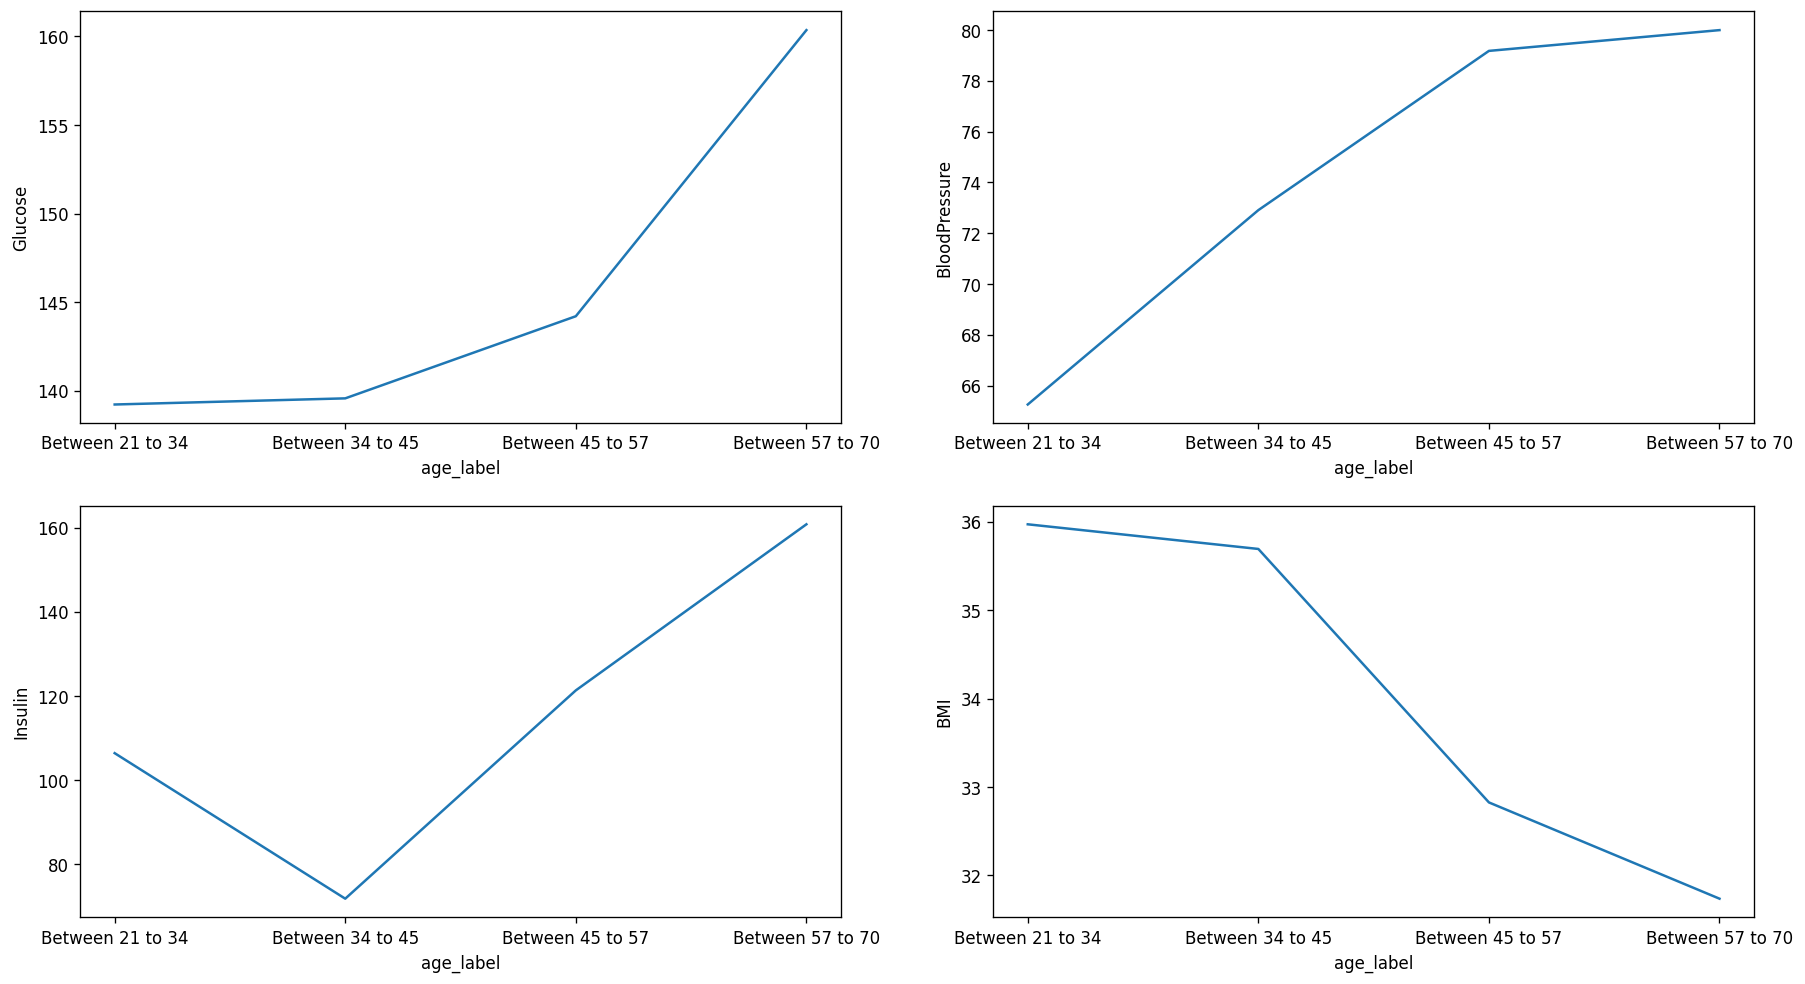

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# figure size in inches
plt.rcParams["figure.dpi"] = 120
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.lineplot(ax=axes[0,0],x='age_label',y='Glucose',data=t)
sns.lineplot(ax=axes[0,1],x='age_label',y='BloodPressure',data=t)
sns.lineplot(ax=axes[1,0],x='age_label',y='Insulin',data=t)
sns.lineplot(ax=axes[1,1],x='age_label',y='BMI',data=t)
plt.show()